In [152]:
import pandas as pd

In [153]:
# Creating a DataFrame for Table 3: Load Profile

data_table_3 = {
    "Hour": list(range(1, 25)),
    "System demand (MW)": [
        1775.835, 1669.815, 1590.3, 1563.795, 1563.795, 1590.3, 1961.37, 2279.43,
        2517.975, 2544.48, 2544.48, 2517.975, 2517.975, 2517.975, 2464.965, 2464.965,
        2623.995, 2650.5, 2650.5, 2544.48, 2411.955, 2199.915, 1934.865, 1669.815
    ]
}

# Creating the DataFrame
data_table_3 = pd.DataFrame(data_table_3)

#save data to csv
data_table_3.to_csv('system_load.csv', index=False)

In [154]:
# Creating a DataFrame for Table 4: Node Location and Distribution of the Total System Demand

data_table_4 = {
    "Load #": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
    "Node": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 18, 19, 20],
    "% of system load": [3.8, 3.4, 6.3, 2.6, 2.5, 4.8, 4.4, 6, 6.1, 6.8, 9.3, 6.8, 11.1, 3.5, 11.7, 6.4, 4.5]
}

# Creating the DataFrame
data_table_4 = pd.DataFrame(data_table_4)

#save data to csv
data_table_4.to_csv('load_distribution.csv', index=False)

In [155]:
con_generators = pd.read_csv('conventional_generators.csv')
cost_mean = con_generators['Production cost [$/MWh]'].mean()
cost_std = con_generators['Production cost [$/MWh]'].std()

In [156]:
import random

#load the data
demand_othersource = pd.read_csv('demands.csv')
node_list = list(demand_othersource['Location [node]'])
power_list = list(demand_othersource[' Consumption [MW]'])

#load demand
sytem_load = pd.read_csv('system_load.csv')

#normalize the demand column
sytem_load['System demand (MW) norm'] = sytem_load['System demand (MW)'] / sytem_load['System demand (MW)'].mean()

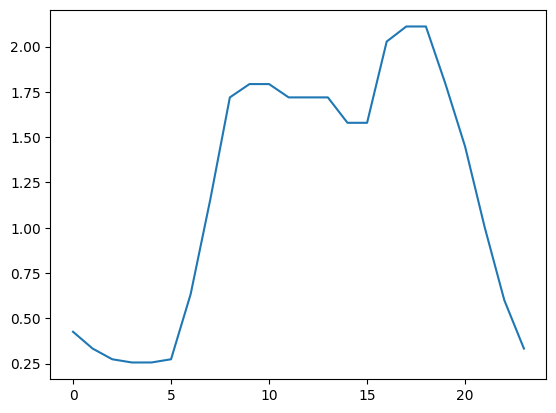

In [157]:
#plot system load
import matplotlib.pyplot as plt
plt.plot(sytem_load['System demand (MW) norm']**4)

In [158]:
import numpy as np

#create dictonary for demand, 20 entries  with an dataframe with random values for each hour, assigned to a node and including quantity and price
demand_dict = {}
for i in range(0,len(node_list)):
    #create vector of random values for each hour with normal distribution with mean 0 and std cost_mean/2
    error_vector = np.random.normal(0, cost_std, 24)    

    demand_dict[i] = pd.DataFrame({'Hour': list(range(1, 25)),
    'Node': node_list[i],
    'Quantity (MW)': power_list[i] * sytem_load['System demand (MW) norm'],
    'Price ($/MWh)': cost_mean * sytem_load['System demand (MW) norm']**4+error_vector})

#save data to csv
for i in range(0,len(node_list)):
    demand_dict[i].to_csv('demand_bids/demand_node_'+str(i)+'.csv', index=False)

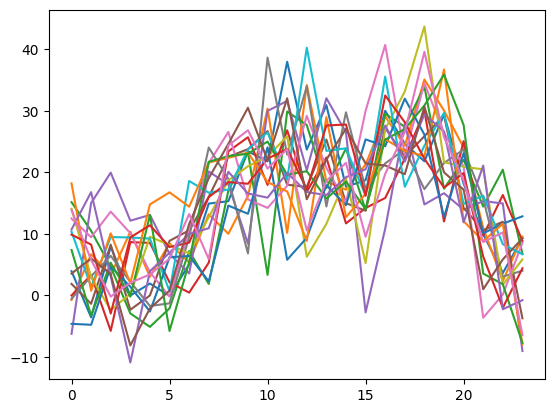

In [159]:
#plot demand prices as lines in the same plot
for i in range(0,len(node_list)):
    plt.plot(demand_dict[i]['Price ($/MWh)'])
plt.show()

In [160]:
#return list of demand_bids folder
import os

# Replace 'your_specific_folder_path' with the path to the folder you are interested in
folder_path = 'demand_bids'

# List all files in the specified folder
file_list = os.listdir(folder_path)


In [161]:
#create for each hour a dataframe of the bids

for hour in range(0,24):
    demand_bids = pd.DataFrame(columns=['Node', 'Quantity (MW)', 'Price ($/MWh)'])
    for bid in file_list:
        bid_df = pd.read_csv('demand_bids/'+bid)
        # Data for the new row
        new_row = {'Node': bid_df['Node'][hour], 'Quantity (MW)': bid_df['Quantity (MW)'][hour], 'Price ($/MWh)':bid_df['Price ($/MWh)'][hour]}

        # Adding a new row without using the append function
        # We're using loc to add a row at a specified index
        demand_bids.loc[len(demand_bids)] = new_row
    #save demand bids
    demand_bids.to_csv('demand_bids_hour/demand_hour_'+str(hour)+'.csv', index=False)

In [162]:
wind_profile = pd.read_csv('wind_powerprofile.csv')
# multiply all values with 200 except of hour column
wind_profile.iloc[:,1:] = wind_profile.iloc[:,1:]*200
#save data to csv
wind_profile.to_csv('wind_powerprofile_200.csv', index=False)